# ロジスティック回帰

## モデル

目的変数$y\in\{0,1\}$の二値分類において、$y=1$である確率を$p$、$y=0$である確率を$1-p$とする。

**ロジスティック回帰（logistic regression）** は$y=1$の確率を表現するモデル

$$
P(y = 1 \mid \boldsymbol{\beta}) = p = \frac{1}{1 + \exp(- \boldsymbol{\beta}^\top \boldsymbol{x} )}
$$

である。ここで $\frac{1}{1 + \exp(-z)}$ は $(-\infty, \infty)$ の入力を $(0, 1)$の範囲にする関数で、 **（ロジスティック）シグモイド関数** という。


また、ロジスティック回帰はオッズ比の対数を線形モデルで説明するモデル

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\log\left( \frac{p}{1-p} \right) = \boldsymbol{\beta}^\top \boldsymbol{x}
$$

ともいえる。

### モデル表現の導出

:::{card} （参考） 2つのモデル表現について

$$
\log\left( \frac{p}{1-p} \right) = \boldsymbol{\beta}^\top \boldsymbol{x}
$$

の両辺の指数をとると

$$
p = \frac{ \exp( \boldsymbol{\beta}^\top \boldsymbol{x} ) }{ 1 + \exp( \boldsymbol{\beta}^\top \boldsymbol{x} ) }
$$

となり、

$$
\frac{ \exp( \boldsymbol{\beta}^\top \boldsymbol{x} ) }{ 1 + \exp( \boldsymbol{\beta}^\top \boldsymbol{x} ) }
= \frac{ 1 }{ 1 + \exp( -\boldsymbol{\beta}^\top \boldsymbol{x} ) }
$$

であるため、2つのモデル表現が同値である。

:::


:::{dropdown} 前半部の導出

$$
\begin{align}
\frac{p}{1-p} &= \exp(\b{\beta}^\top \b{x})\\
\implies
p &= \exp(\b{\beta}^\top \b{x}) (1-p)\\
  &= \exp(\b{\beta}^\top \b{x}) - p \exp(\b{\beta}^\top \b{x})
\end{align}
$$

両辺を$p$で割ると

$$
\begin{align}
1  &= \exp(\b{\beta}^\top \b{x}) \frac{1}{p} - \exp(\b{\beta}^\top \b{x})\\
1 + \exp(\b{\beta}^\top \b{x}) &= \exp(\b{\beta}^\top \b{x}) \frac{1}{p}\\
\implies p &= \frac{ \exp(\b{\beta}^\top \b{x}) }{ 1 + \exp(\b{\beta}^\top \b{x}) }
\end{align}
$$
:::


:::{dropdown} 後半部の導出

$$
\frac{\exp(z)}{1 + \exp(z)} = \frac{1}{1 + \exp(-z)}
$$

については、分子・分母に$\exp(z)$を掛けると

$$
\frac{\exp(z)/\exp(z)}{ (1 + \exp(z)) /\exp(z)}
= \frac{1}{ (1 + \exp(z)) /\exp(z)}
$$

であり、分母部分 $(1 + \exp(z)) /\exp(z)$ については

$$
\begin{aligned}
\frac{ 1 + \exp(z)}{ \exp(z) }
&= \frac{ 1 }{ \exp(z) } + \frac{ \exp(z)}{ \exp(z) }\\
&= \exp(-z) + 1\\
\end{aligned}
$$

となる。

※$\frac{ 1 }{ \exp(z) } = \exp(-z)$については、 $\frac{ 1 }{ \exp(z) }$ は $\exp(z)$ と乗じると $1$ になるため、指数法則 $e^{n} \cdot e^{m} = e^{nm}$ より、 $\exp(-z)$ となる

:::

## 誤差関数

ロジスティック回帰は、統計学的な言い方だと最尤推定法でパラメータを推定する。

機械学習的な言い方をすると交差エントロピー誤差を最小化するようにパラメータを推定する。


### ベルヌーイ分布

ロジスティック回帰は$P(y=1) = p, P(y = 0) = 1-p$のベルヌーイ分布に従う。

$$
P(y) = \begin{cases}
p & \text{if } y = 1\\
1-p & \text{if } y = 0
\end{cases}
$$

この確率質量関数は一括で書くと

$$
P(Y=y) = p^y (1 - p)^{1-y}
$$

と書くことができる。

### 尤度関数

尤度関数$L(\theta)$とは一般に確率(密度/質量)関数$f(x| \theta)$の積

$$
L(\theta) = \prod^n_{i=1} f(x_i| \theta)
$$

である（独立に得られたサンプルを仮定するので単純な積が同時確率を意味する）。

そのため、ベルヌーイ分布の尤度関数は

$$
L(p) = \prod^n_{i=1} p^{y_i} (1 - p)^{1- y_i}
$$

となる。

ロジスティック回帰で使う場合、$p \in [0, 1]$はロジスティック回帰の予測値$p_i=\sigma(\beta^\top x_i)$、$y \in \{0, 1\}$は実測値である。

$$
L(\beta) = \prod^n_{i=1} p_i^{y_i} (1 - p_i)^{1- y_i}
$$

確率の積だとすごく小さい値になって計算が大変なので、通常は対数を取った対数尤度を使う。

$$
\ell(\beta)=\ln L(\beta)=\sum_{i=1}^n \left[y_i \ln p_i + (1-y_i) \ln (1-p_i)\right]
$$

### 交差エントロピー誤差

ベルヌーイ分布の対数尤度関数の符号を負に反転させたものを**交差エントロピー誤差**（cross entropy loss）という。log lossやlogistic lossとも呼ばれる

$$
\mathcal{L}(\beta) = -\ell(\beta)
= -\sum^n_{i=1} \{ y_i \ln p_i + (1 - y_i) \ln (1 - p_i) \}
$$

単に言葉の問題だが、統計学系の分野では「対数尤度の最大化（最尤推定法）」という言い方をして、機械学習では「交差エントロピー誤差（=負の対数尤度）の最小化」とか言う。やってることは同じ。



## スクラッチ実装例

In [1]:
# 対数尤度
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_likelihood(X, y, beta):
    p = sigmoid(X @ beta)
    c = 0.0001
    p = np.clip(p, a_min=c, a_max=1 - c) # log(p), log(1-p)でゼロをいれないようにする
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

2次元の特徴量からなる、次のようなデータがあるとする

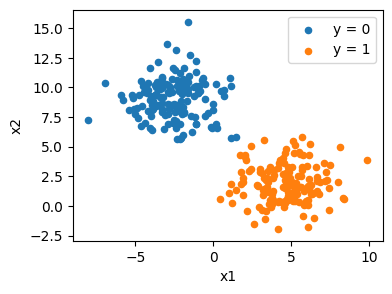

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# データ生成
X, y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.7, random_state=42)

# プロット
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(X[y == 0, 0], X[y == 0, 1], s=20, label="y = 0")
ax.scatter(X[y == 1, 0], X[y == 1, 1], s=20, label="y = 1")
ax.legend()
ax.set(xlim=(X[:, 0].min()-1, X[:, 0].max()+1), ylim=(X[:, 1].min()-1, X[:, 1].max()+1))
ax.set(xlabel="x1", ylabel="x2")
plt.show()

さまざまな$\beta_1, \beta_2$の値のもとでの対数尤度を計算すると次のような等高線になる

/tmp/ipykernel_40358/1805774186.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


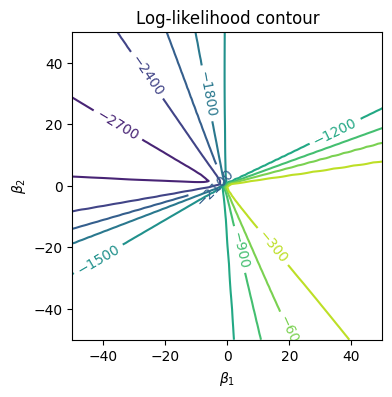

In [3]:
# 対数尤度のplot
import matplotlib.pyplot as plt

# --- βのグリッド ---
beta_range = np.linspace(-50, 50, 100)
B1, B2 = np.meshgrid(beta_range, beta_range)

# --- 尤度を格子上で計算 ---
LL = np.zeros_like(B1)
for i in range(B1.shape[0]):
    for j in range(B1.shape[1]):
        beta = np.array([B1[i, j], B2[i, j]])
        LL[i, j] = log_likelihood(X, y, beta)

# --- contour plot ---
fig, ax = plt.subplots(figsize=(4, 4))
cs = ax.contour(B1, B2, LL, levels=10)
ax.clabel(cs)
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\beta_2$")
ax.set_title("Log-likelihood contour")
plt.show()

In [4]:
from scipy.optimize import minimize

beta0 = np.zeros(X.shape[1])
res = minimize(
    fun=lambda beta: -log_likelihood(X, y, beta), # minimizeの関数なので負にする
    x0=beta0,
    method="BFGS",
    options={"gtol": 1e-6, "maxiter": 1000},
)

beta_hat = res.x
print("success:", res.success)
print("message:", res.message)
print("beta_hat:", beta_hat)
print("max loglik:", -res.fun)

success: True
message: Optimization terminated successfully.
beta_hat: [ 41.07515312 -13.2522211 ]
max loglik: -0.0300015001000042


推定値での識別境界は次のようになる

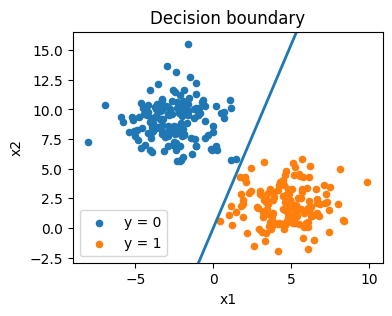

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

b1, b2 = beta_hat

# --- 散布図 ---
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(X[y == 0, 0], X[y == 0, 1], s=20, label="y = 0")
ax.scatter(X[y == 1, 0], X[y == 1, 1], s=20, label="y = 1")
ax.legend()
ax.set(xlim=(X[:, 0].min()-1, X[:, 0].max()+1), ylim=(X[:, 1].min()-1, X[:, 1].max()+1))

# --- 識別境界 ---
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
eps = 1e-12
if abs(b2) > eps:
    # 切片なしモデルだと識別境界は b1*x1 + b2*x2 = 0 → x2 = - (b1/b2) * x1
    x2 = -(b1 / b2) * x1
    ax.plot(x1, x2, linewidth=2)
else:
    # β2 = 0 → 垂直線 β1 x1 = 0
    ax.axvline(0.0, linewidth=2)

ax.set(xlabel="x1", ylabel="x2", title="Decision boundary")
plt.show()


### 勾配

交差エントロピーの勾配は

$$
\nabla \mathcal{L}(\beta)
= \frac{ \partial \mathcal{L}(\beta) } { \partial \beta }
= \sum^n_{i=1} (p_i - y_i) x_i
$$

:::{dropdown} 導出
総和を取るまえの1レコード単位のものを使う。

$$
\newcommand{\s}{ \sigma(\beta^\top x) }
\ell(\beta) = y \ln \s + (1 - y) \ln (1 - \s)
$$

$\s$に関する微分

$$
\begin{align}
\frac{d \ln \s}{d \beta}
&= \frac{d \ln \s}{d \s} \frac{d \s}{d (\beta^\top x)} \frac{d (\beta^\top x)}{d \beta}\\
&= \frac{1}{\s} \cdot \s (1 - \s) \cdot x\\
&= 1 - \s x
\\
\frac{d \ln (1 -\s)}{d \beta}
&= \frac{d \ln (1 -\s)}{d \s} \frac{d \s}{d (\beta^\top x)} \frac{d (\beta^\top x)}{d \beta}\\
&= -\frac{1}{1-\s} \cdot \s (1 - \s) \cdot x\\
&= - \s x
\end{align}
$$

より、

$$
\begin{align}
\frac{d \ell(\beta)}{d\beta}
&= y (1 - \s)x - (1 - y) \s x\\
&= (y - y\s - \s + y\s) x\\
&= (y - \s ) x\\
\end{align}
$$


（参考）使った微分

$$
\begin{align}
\frac{d \log x}{dx} &= \frac{1}{x}\\
\frac{d \sigma(x)}{dx} &= \sigma(x) (1- \sigma(x))\\
\frac{d \sigma(\beta^\top x)}{dx} &= \frac{d \sigma(\beta^\top x)}{d(\beta^\top x)} \times \frac{d (\beta^\top x)}{dx}
= \sigma(\beta^\top x) (1- \sigma(\beta^\top x)) \times x \\
\end{align}
$$

:::

In [6]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)


## $y \in \{-1, 1\}$にする場合

上記の例では$y \in \{0, 1\}$としていた。$y\in \{-1, 1\}$とする場合は少し書き方が変わる

$y=1$の確率と$y=-1$の確率がそれぞれ

$$
\begin{align}
p(y=1|x) &= \frac{\exp(\beta^\top x)}{1 + \exp(\beta^\top x)}
  = \frac{ 1 }{1 + \exp(- \beta^\top x)}\\
p(y=-1|x) &= 1 - p(y=1|x)\\
  &= \frac{ 1 + \exp(\beta^\top x)}{1 + \exp(\beta^\top x)} - \frac{\exp(\beta^\top x)}{1 + \exp(\beta^\top x)}
  = \frac{ 1 }{1 + \exp(\beta^\top x)}\\
\end{align}
$$

で表されるとする。$y\in \{-1, 1\}$のとき、これらを1つにまとめて、$y$の確率を

$$
p(y|x) = \frac{1}{1 + \exp(- y \beta^\top x )}
$$

と書くことができる。

尤度は

$$
\prod^n_{i=1} \frac{1}{1 + \exp(- y_i \beta^\top x_i )}
$$

負の対数尤度は

$$
\sum^n_{i=1} \log \big( 1 + \exp(- y_i \beta^\top x_i ) \big)
$$

と書くことができる。機械学習の分野だとこちらの表現のほうが目にするかも。

:::{margin}
$$
\log \frac{M}{N} = \log M - \log N
$$

のため

$$
\begin{align}
\log \frac{1}{1 + \exp(- y_i \beta^\top x_i )}
= \log 1 - \log (1 + \exp(- y_i \beta^\top x_i ))\\
= 0 - \log (1 + \exp(- y_i \beta^\top x_i ))
\end{align}
$$
:::

## 線形分離可能性

機械学習として（目的変数の予測が目的）のロジスティック回帰では、線形分離可能な問題であることが嬉しい

統計学としては最尤推定量が存在しない（解が一意に定まらない）という扱いになる様子

- [ロジスティック回帰に最尤推定量が存在するか判定する - ほくそ笑む](https://hoxo-m.hatenablog.com/entry/2024/02/26/210225)
